# OCR in python (optical character recogniztion)

## common workflow (sequential pipeline)
### PIL(pillow) => open an image
### OpenCV => Change an Image
### Tessereact (PyTesseract) => OCR an image

In [1]:
# we can manipulate the image with OpenCV

In [ ]:
#workflow Example
#1. convert big tabular image to single rows of images
#2. extract individual rows from table as image 
#3. pass file to Tesseract 

## bounding boxes
## Tablua library (cretain problems cannot be solved by tabula)
## every ocr problem is different in their own


### installation 

In [5]:
!pip install pillow


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
!pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [6]:
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
!pip install pytesseract



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
import cv2
from PIL import Image
import pytesseract

## Preprocessing of Images for OCR

### 1. Using pillow library 

In [4]:
im_file = "./test_case1.png"  #path of img

im = Image.open(im_file)      #object creation
print(im)
print(im.size)
im.show()                     #to open image in photo viewer

# im.rotate(90).show()          #to rotate image

<PIL.PngImagePlugin.PngImageFile image mode=P size=225x225 at 0x2EC26A1F90>
(225, 225)


In [5]:
# saving the image
im.save("temp/page_01.png")
altered_im = im.rotate(90)
altered_im.save("temp/altered.png")

### 2. Using OpenCV

### 0. Opening an Image

In [15]:
import cv2
import matplotlib.pyplot as plt
image_file = "./test_case1.png"
img = cv2.imread(image_file)
print(img.shape)

(225, 225, 3)


In [7]:
import matplotlib.pyplot as plt
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    if(len(im_data.shape)==2):
        height , width = im_data.shape
    else:
        height , width , depth = im_data.shape
    
    # what size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi) , height / float(dpi)
    
    # create a figure of the right size with one axes that takes up the ull figure 
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    
    # Hide spines, ticks etc.
    ax.axis('off')
    
    #display the image
    ax.imshow(im_data , cmap = 'gray')
    plt.show()

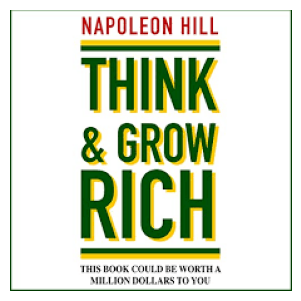

In [8]:
display(image_file)

### 1. Inverted Images

In [9]:
# white spectrum is black and vice versa 
inverted_image = cv2.bitwise_not(img)

cv2.imwrite("temp/inverted.png",inverted_image)               # saving syntax in opencv

True

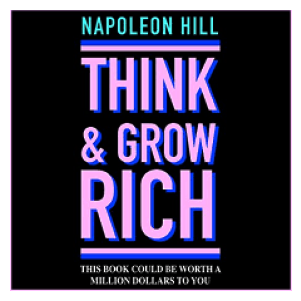

In [24]:
display('temp/inverted.png')

### 2. Rescaling

In [25]:
# 

### 3. Binarization

In [10]:
# requires image in greyscale
## function to convert image to grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [11]:
gray_image = grayscale(img)
print("shape:",gray_image.shape)
cv2.imwrite('temp/grayscale.png',gray_image)

shape: (225, 225)


True

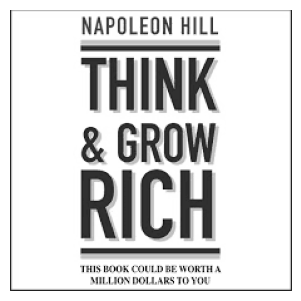

In [14]:
display("./temp/grayscale.png")

In [13]:
thresh , im_bw = cv2.threshold(gray_image,210,240,cv2.THRESH_BINARY)
print(im_bw.shape)
cv2.imwrite("temp/bw_image.png",im_bw)

(225, 225)


True

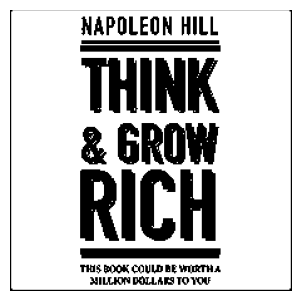

In [60]:
display("temp/bw_image.png")

In [61]:
# more difficult for humans to read , certain things might be easy for machines

#### Noise : It is pixels which dont corrosponds to text is called noise 


## consider noise removal only when till im_bw image result is yet required to get better        (if 95% >accuracy then no need)

### 4. Noise Removal

In [11]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1),np.uint8)    ## central component for ML 1st arg :- size (size of how we capturing noise)  
    image = cv2.dilate(image,kernel,iterations=1)
    kernel2 = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image = cv2.medianBlur(image,3)
    return (image)

In [12]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg",no_noise)

True

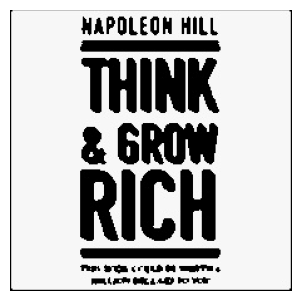

In [13]:
display("temp/no_noise.jpg")

## what would we do if we have thick letters , thin letters ??

### 5. Dilation and Erosion

In [71]:
# for adjusting font sizing 


In [90]:
# we need inverted image here 
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,3),np.uint8)
    image = cv2.erode(image,kernel , iterations =1)
    image = cv2.bitwise_not(image)
    return (image)

In [91]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg",eroded_image)

True

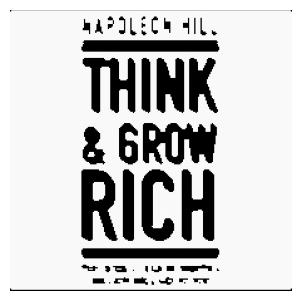

In [92]:
display("temp/eroded_image.jpg")

In [14]:
# we need inverted image here 
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.dilate(image,kernel , iterations =1)
    image = cv2.bitwise_not(image)
    return (image)

In [15]:
no_noise = cv2.imread('temp/no_noise.jpg')
dilated_image = thick_font(no_noise)
cv2.imwrite('temp/dilated_image.jpg',dilated_image)


True

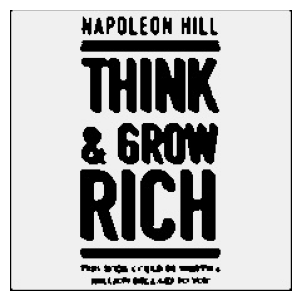

In [16]:
display("temp/dilated_image.jpg")

### 6. Rotation and deskewing

In [24]:
# ocr is built to work vertical allign text

In [17]:
rot_img = cv2.imread("test_case_rotated_image.jpg")


In [46]:
import numpy as np

def getSkewAngle(cvImage) -> float :
    # prep image , copy , convert to gray scale , blur , and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(9,9),0)
    thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line , cancelling out any spaces .
    # But use smaller kernel on Y axis to separate between different blocks of text
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(30,5))
    dilate = cv2.dilate(thresh , kernel , iterations=2)
    
    # find all contours
    contours,hierarchy = cv2.findContours(dilate, cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours,key = cv2.contourArea,reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)
        
    # find largest contour and surrounded in min area box 
    largestContour = contours[0]
    print(len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg",newImage)
    # Determine the angle . convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle <-45:
        angle = 90 + angle
    return -1.0 * angle

# Rotate the image around center 
def rotateImage(cvImage,angle:float):
    newImage = cvImage.copy()
    (h,w)=newImage.shape[:2]
    center =(w//2,h//2)
    M = cv2.getRotationMatrix2D(center,angle ,1.0)
    newImage = cv2.warpAffine(newImage ,M , (w,h), flags =cv2.INTER_CUBIC , borderMode = cv2.BORDER_REPLICATE)
    return newImage 
    
'''
bound boxes : angular 
# you shouldnt have border 
# blurring helps in contour processing that lead to bounding box
'''

'\nbound boxes : angular \n# you shouldnt have border \n'

In [47]:
# Deskew image 
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    print("Angle:",angle)
    if angle>0:
        return rotateImage(cvImage , 1.0* angle)
    else :
        return rotateImage(cvImage , - 1.0* angle)

In [48]:
fixed =deskew(rot_img)
cv2.imwrite("temp/rotated_fixed.jpg",fixed)


7
Angle: -23.979745864868164


True

original IMAGE:


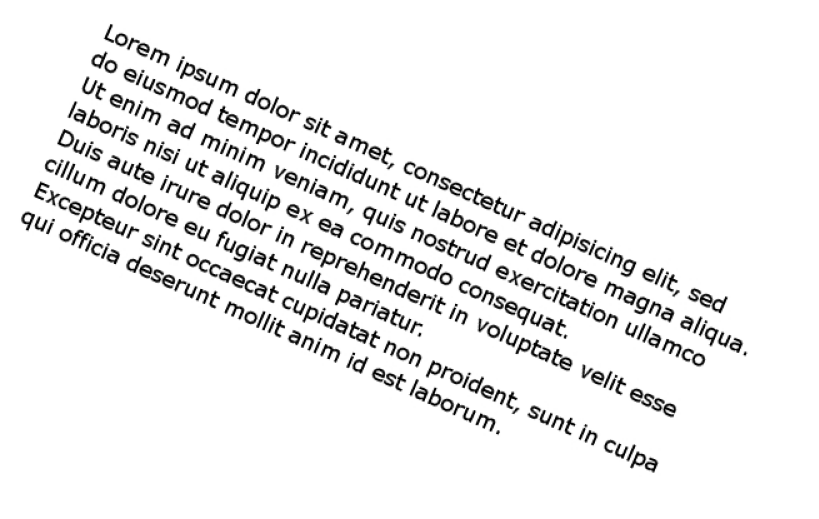

In [51]:
print("original IMAGE:")
display("test_case_rotated_image.jpg")

Image after Processing :


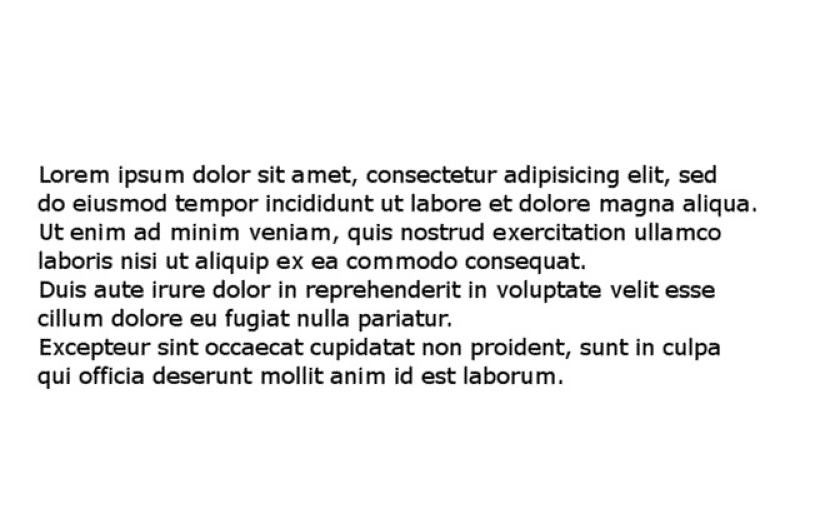

In [52]:
print("Image after Processing :")
display("temp/rotated_fixed.jpg")

### Remove some border 

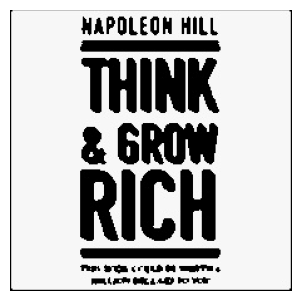

In [14]:
display("temp/no_noise.jpg")

In [15]:
def remove_borders(image):
    contours , heirarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours , key = lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x,y,w,h = cv2.boundingRect(cnt)
    crop = image[y:y+h,x:x+w]
    return (crop)

'''if margin borders are consistent in pdfs then dont use this method , preprocess them with pdf editor'''

'if margin borders are consistent in pdfs then dont use this method , preprocess them with pdf editor'

In [16]:
no_borders = remove_borders(no_noise)
cv2.imwrite("temp/no_borders.jpg",no_borders)

True

normal image:


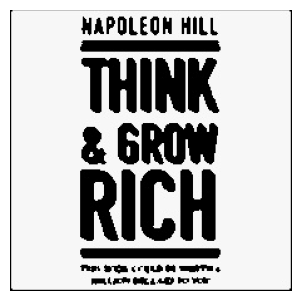

In [17]:
print("normal image:")
display("temp/no_noise.jpg")

after removing borders:


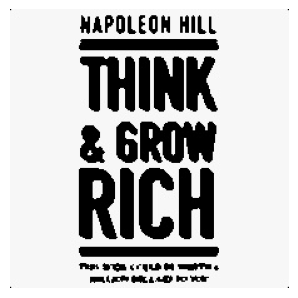

In [18]:
print("after removing borders:")
display("temp/no_borders.jpg")

### 8. Missing Borders

In [23]:
color = [221,221,221]
top , bottom , left , right = [150]*4

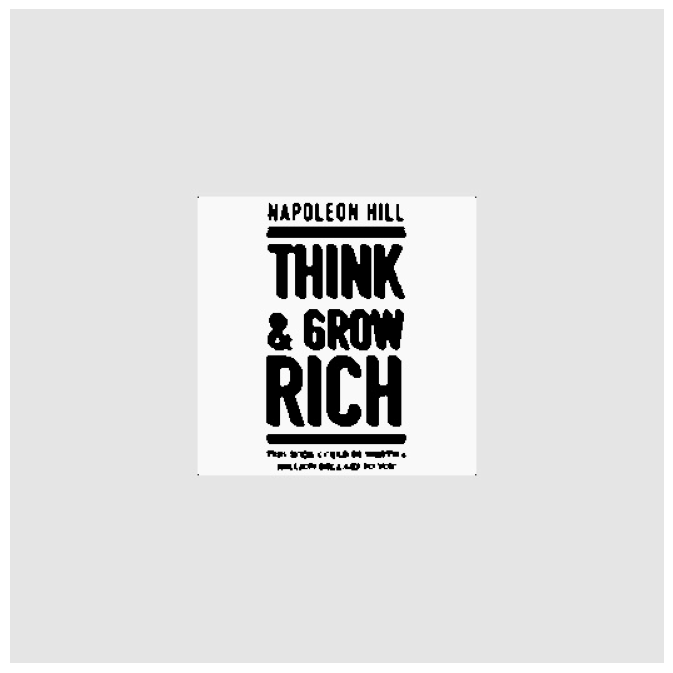

In [24]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom , left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg",image_with_border)
display("temp/image_with_border.jpg")

# PYTESSERACT introduction

In [15]:
import pytesseract
from PIL import Image

In [16]:
img_file = 'temp/rotated_fixed.jpg'
no_noise = img_file

In [17]:
img = Image.open(img_file)

In [18]:
ocr_result = pytesseract.image_to_string(img)

In [19]:
print(ocr_result)

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed

do ejusmod tempor incididunt ut labore et dolore magna aliqua.
Ut enim ad minim veniam, quis nostrud exercitation ullamco
laboris nisi ut aliquip ex ea commodo consequat.

Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur.

Excepteur sint occaecat cupidatat non proident, sunt in culpa
qui officia deserunt mollit anim id est laborum.



In [20]:
# this is simple ocr so image should be preprocessed in order to get error free text words out of image

In [21]:
# dragins in ocr (if 98%ile range this is normal )

## HOW to OCR a tricolumn or INDEX 

In [22]:
# we have to extract the sections in which we need ocr

In [45]:
import matplotlib.pyplot as plt
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    if(len(im_data.shape)==2):
        height , width = im_data.shape
    else:
        height , width , depth = im_data.shape
    
    # what size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi) , height / float(dpi)
    
    # create a figure of the right size with one axes that takes up the ull figure 
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    
    # Hide spines, ticks etc.
    ax.axis('off')
    
    #display the image
    ax.imshow(im_data , cmap = 'gray')
    plt.show()

In [46]:
'''what we can do in pytesseract and openCV that we cannot do in pillow is that we can use COMPUTER VISION 
to automatically identify column in this image and go through ocr each columns'''

'what we can do in pytesseract and openCV that we cannot do in pillow is that we can use COMPUTER VISION \nto automatically identify column in this image and go through ocr each columns'

In [47]:
import pytesseract 
import cv2

# creating function from here 

In [48]:
image = cv2.imread("./index2.png")
base_image = cv2.imread("./index2.png")

In [ ]:
display("./index2.png")

In [ ]:
### 1. graying the image

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [ ]:
cv2.imwrite("temp/index2_gray.jpg",gray)

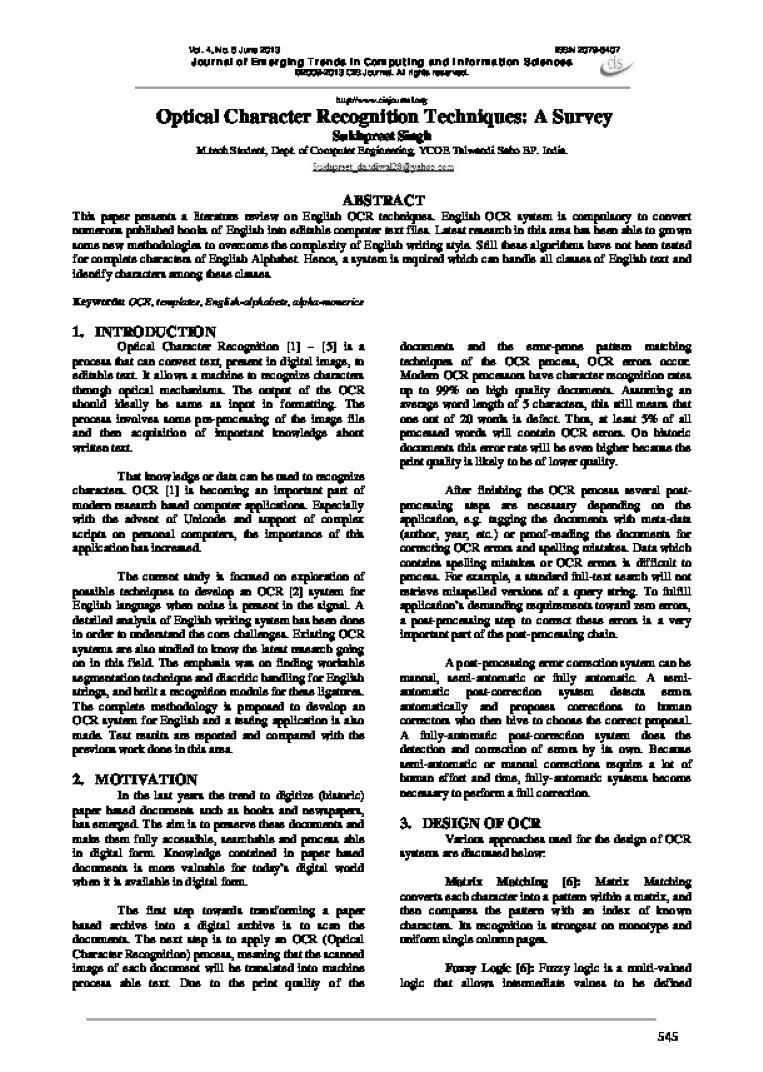

In [53]:
display("temp/index2_gray.jpg")

### 2. Blur technique

In [55]:
blur = cv2.GaussianBlur(gray,(7,7),0)        #object,size of blurring,

In [56]:
cv2.imwrite("temp/index2_blur.jpg",blur)

True

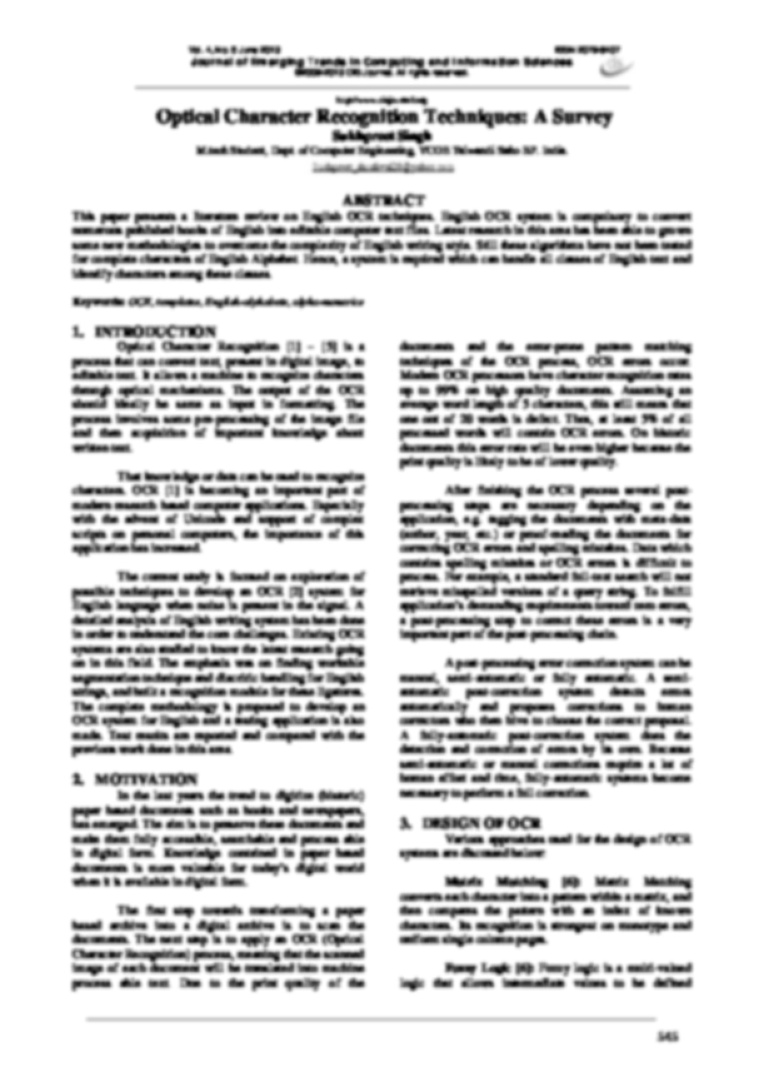

In [57]:
display("temp/index2_blur.jpg")

### 3. threshold image

In [58]:
thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]       # blurr object , range , 

In [59]:
cv2.imwrite("temp/index2_thresh.jpg",thresh)

True

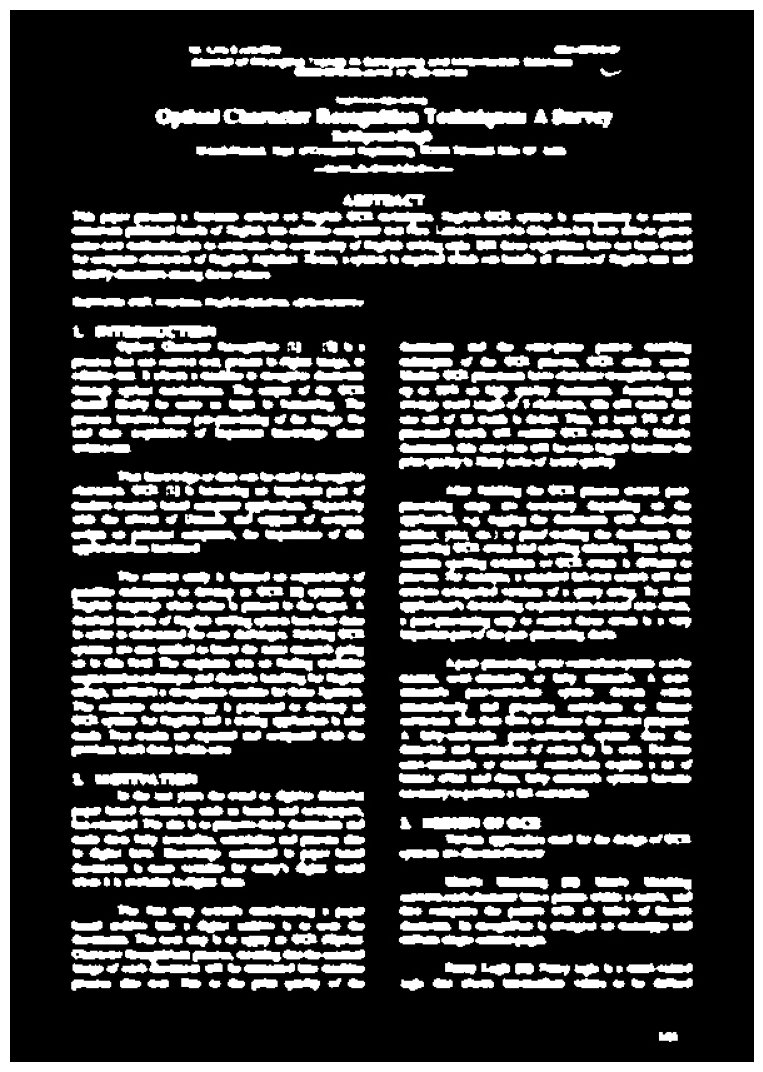

In [60]:
display("temp/index2_thresh.jpg")

In [61]:
# next preprocessing is to creation of individual kernels and dilation technique we saw above 

### 4. Kernels and Dilation

In [62]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))

In [63]:
cv2.imwrite("temp/index2_kernel.jpg",kernel)

True

In [64]:
display("temp/index2_kernel.jpg")

In [65]:
dilate = cv2.dilate(thresh, kernel , iterations=1)

In [66]:
cv2.imwrite("temp/index2_dilate.jpg",dilate)

True

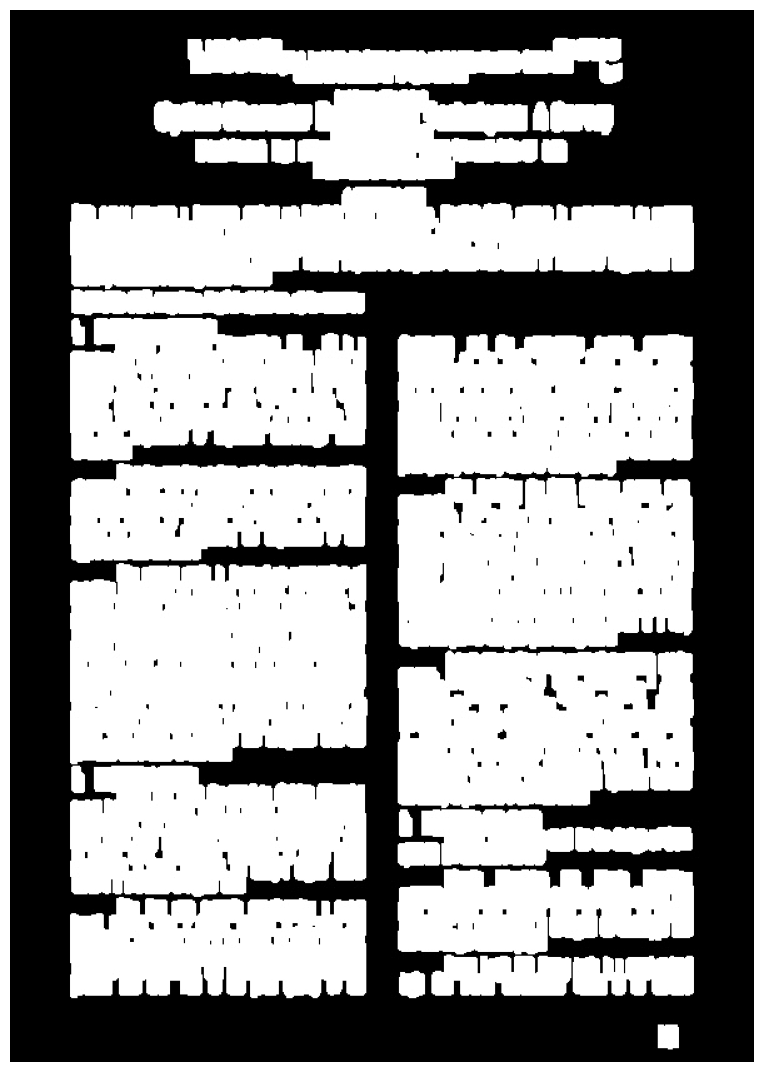

In [67]:
display("temp/index2_dilate.jpg")

In [68]:
#### this is how we identify structure , now we can start creating bounding boxes around this columns 

### 5. creations of contours `cnts` 

In [69]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [70]:
cnts = cnts[0] if len(cnts)==2 else cnts[1]

In [71]:
# Contours are more often unstructured so to make systematic we sort the contours cnts

In [81]:
cnts = sorted(cnts, key=lambda x:cv2.boundingRect(x)[0])

In [90]:
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h>50 & w>50:
        cv2.rectangle(base_image,(x,y),(x+w,y+h),(36,255,12),1)
cv2.imwrite("temp/index2_bbox.jpg",base_image)

True

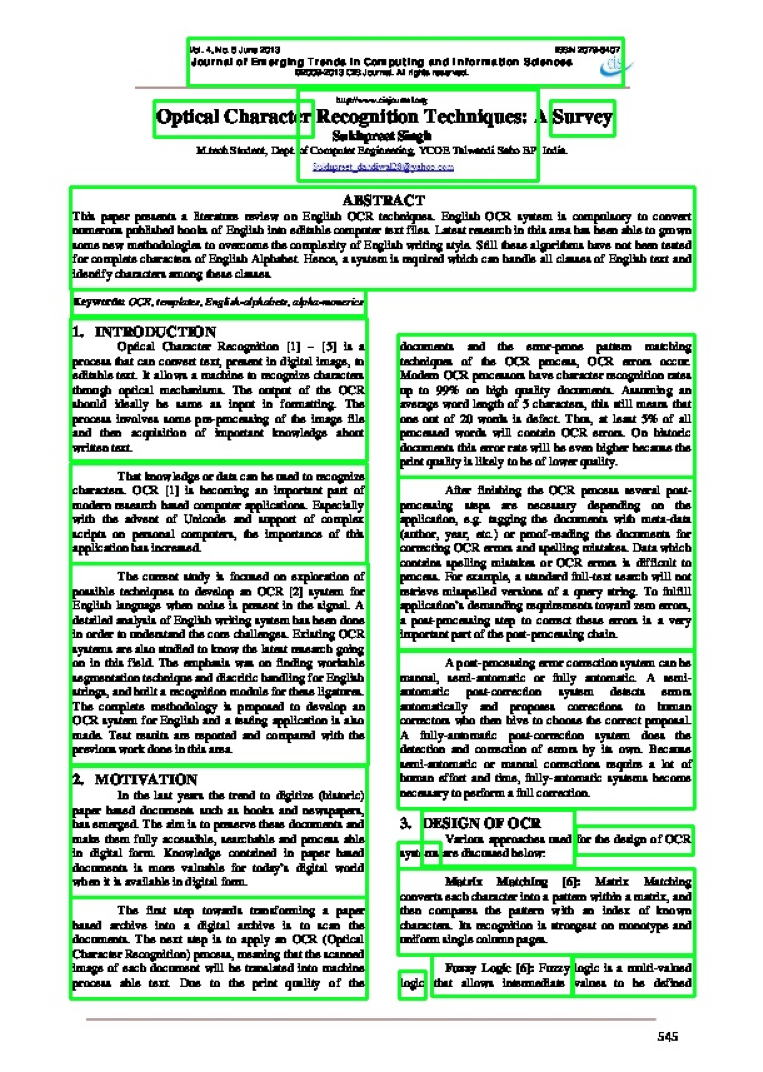

In [91]:
display("temp/index2_bbox.jpg")

In [5]:
import matplotlib.pyplot as plt
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    if(len(im_data.shape)==2):
        height , width = im_data.shape
    else:
        height , width , depth = im_data.shape
    
    # what size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi) , height / float(dpi)
    
    # create a figure of the right size with one axes that takes up the ull figure 
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    
    # Hide spines, ticks etc.
    ax.axis('off')
    
    #display the image
    ax.imshow(im_data , cmap="gray")
    plt.show()

In [2]:
import cv2
image_url = "image_for_practice_.jpg"

def create_bounding_boxes(image_url):
    image = cv2.imread(image_url)
    
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     print("gray")
#     cv2.imwrite("bbox_gray.jpg",gray)
#     display("bbox_gray.jpg")
    blur = cv2.GaussianBlur(gray,(7,7),0)        #object,size of blurring,
#     print("blur")
#     cv2.imwrite("bbox_blur.jpg",blur)
#     display("bbox_blur.jpg")
    thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]       # blurr object , range ,
#     print("thresh")
#     cv2.imwrite("bbox_thresh.jpg",thresh)
#     display("bbox_thresh.jpg")
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
    
    dilate = cv2.dilate(thresh, kernel , iterations=1)
#     print("dilate")
#     cv2.imwrite("bbox_dilate.jpg",dilate)
#     display("bbox_dilate.jpg")
#     cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts)==2 else cnts[1]
    
    cnts = sorted(cnts, key=lambda x:cv2.boundingRect(x)[0])
    i=1
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),1)
        print(f"bbox{i}")
        i+=1
        cv2.imwrite("bbox_image.jpg",image)
        display("bbox_image.jpg")

bbox1


bbox2


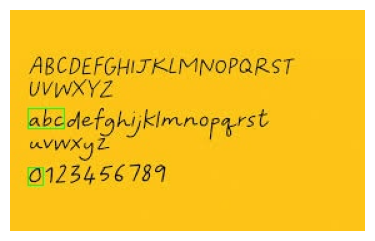

bbox3


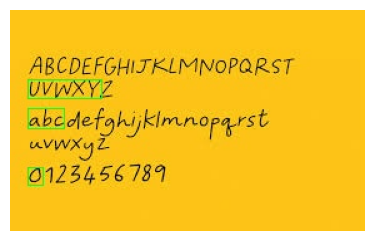

bbox4


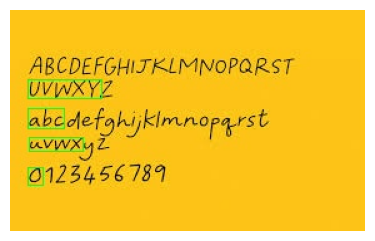

bbox5


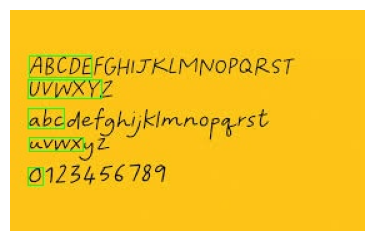

bbox6


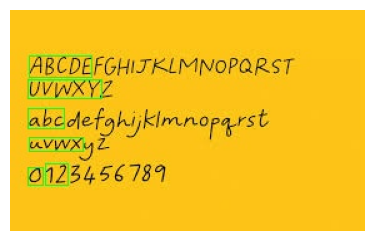

bbox7


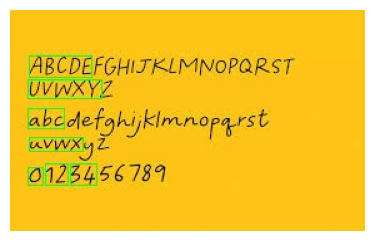

bbox8


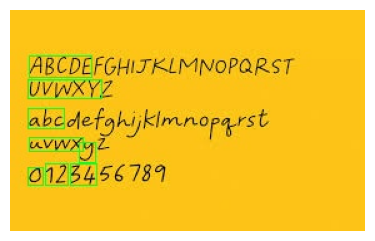

bbox9


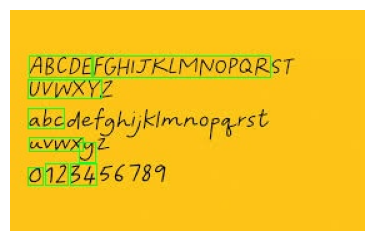

bbox10


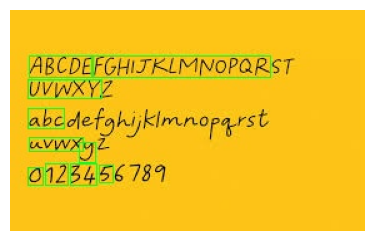

bbox11


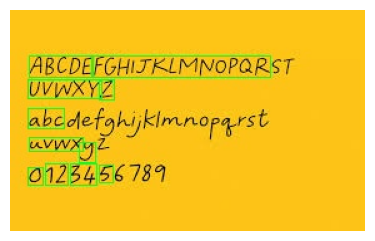

bbox12


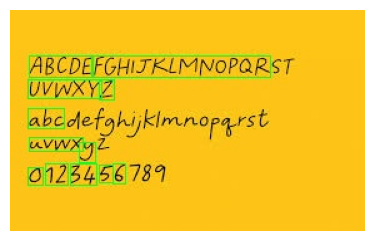

bbox13


bbox14


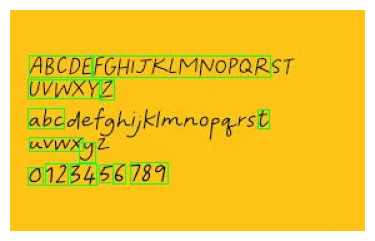

bbox15


In [7]:
create_bounding_boxes(image_url)